In [1]:
import sys
sys.path.append('..')

import sympy
import numpy as np
from copy import deepcopy
import pandas as pd
from eulera_methods import ExplicitEuleraMethod, Method, TableFucntion, EuleraCauchyMethod, ImprovedEuleraMethod
from runge_kutta_method import RungeKuttaMethod
from adams_method import AdamsBashfortsMoultonMethod, AdamsMethod
import matplotlib.pyplot as plt

In [2]:
x,y,z = sympy.symbols('x,y,z')
step = 0.1
func = {
    y: z,
    z:(1+2*sympy.tan(x)**2)*y
}
f_real = 1/sympy.cos(x) + sympy.sin(x) + x/sympy.cos(x)
# f_real = (1/x)*sympy.exp(x**2/2)
sdata = {
    x:0,
    y:1,
    z:2
}
section = [0,1]         
parametrs_class_obj = {
    'step':step,
    'section': section
}
parametrs_for_solve = {
    'func_dict':func,
    'sdata_dict':sdata,
    'ans_vars':(x,y)
}
steps = [0.1,0.05]
methods = [EuleraCauchyMethod, RungeKuttaMethod, AdamsBashfortsMoultonMethod]
# methods = [RungeKuttaMethod]

Precision Ronge-Runberga - Eulera Cauchy Method :
List:[0 0.000267979129091378 0.000608230177561842 0.00105658264696706
 0.00166743019763693 0.00252793641132198 0.00378488291988477
 0.00569863091708678 0.00875924341358303 0.0139576843433944
 0.0234873851012640]
mean:0.00561963502343565
Precision Ronge-Runberga - Runge Kutta Method :
List:[0 3.72906298506948e-7 8.65571698538403e-7 1.56421869479395e-6
 2.61946697044380e-6 4.31283307333885e-6 7.20489495042997e-6
 1.24916853825319e-5 2.29404907976516e-5 4.56226437628438e-5
 0.000101034930625410]
mean:0.0000180936038413172
Precision Ronge-Runberga - Adams Bashforts Moulton Method :
List:[0 3.72906298506948e-7 8.25598574394348e-7 1.38218120682154e-6
 6.35012217320430e-6 1.16689416791438e-5 1.94757069702511e-5
 3.46076009822838e-5 7.13427061231897e-5 0.000173173613144950
 0.000483500425867867]
mean:0.0000729727093655102


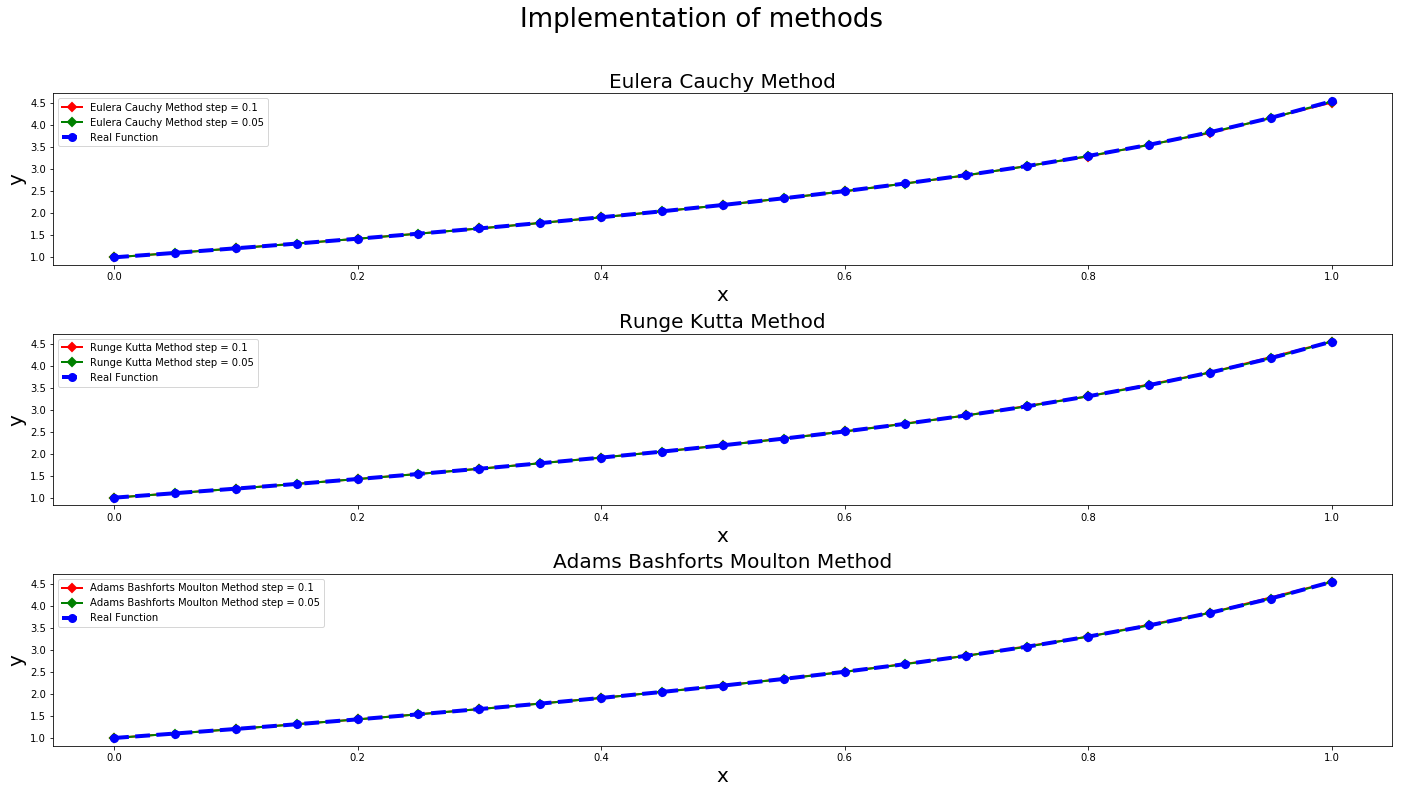

In [7]:
nrows = len(methods)
ncols = len(steps)
color_step = ['red', 'green']
fig, axs = plt.subplots(nrows=nrows,ncols=1,figsize = (24,12))
plt.subplots_adjust(wspace=0.1, hspace=0.4)
fig.suptitle('Implementation of methods',size = 26)
for i,Method in enumerate(methods):
    table_fucntions = []
    for j,step in enumerate(steps):
        parametrs_class_obj['step'] = step
        method  = Method(**parametrs_class_obj)
        table_function = method.solve(**parametrs_for_solve)
        table_fucntions.append(table_function)
        axs[i].plot(
            table_function.table[x].values,
            table_function.table[y].values,
            marker = 'D',
            markeredgewidth=2,
            color = color_step[j],
            linewidth= 2,
            label = f'{Method.name} step = {step}'
        )
        
    f_real_values =np.array([f_real.subs(dict(zip(table_function.varibals, [xi]))) for xi in table_function.table[x].values]) 
    axs[i].plot(
            table_function.table[x].values,
            f_real_values,
            marker = 'o',
            markeredgewidth=3,
            linestyle='--',
            color = 'blue',
            linewidth= 4,
            label="Real Function"
        )
    axs[i].set_title(f'{Method.name}',size = 20)
    axs[i].set_xlabel('x',size=20)
    axs[i].set_ylabel('y',size=20)
    axs[i].legend()
    F_rung,x_vec,eps_rung = Method.precision_runberg(f_real, table_fucntions[0],table_fucntions[1],2,2)
    print(f'Precision Ronge-Runberga - {Method.name} :\nList:{eps_rung}\nmean:{np.mean(eps_rung)}')